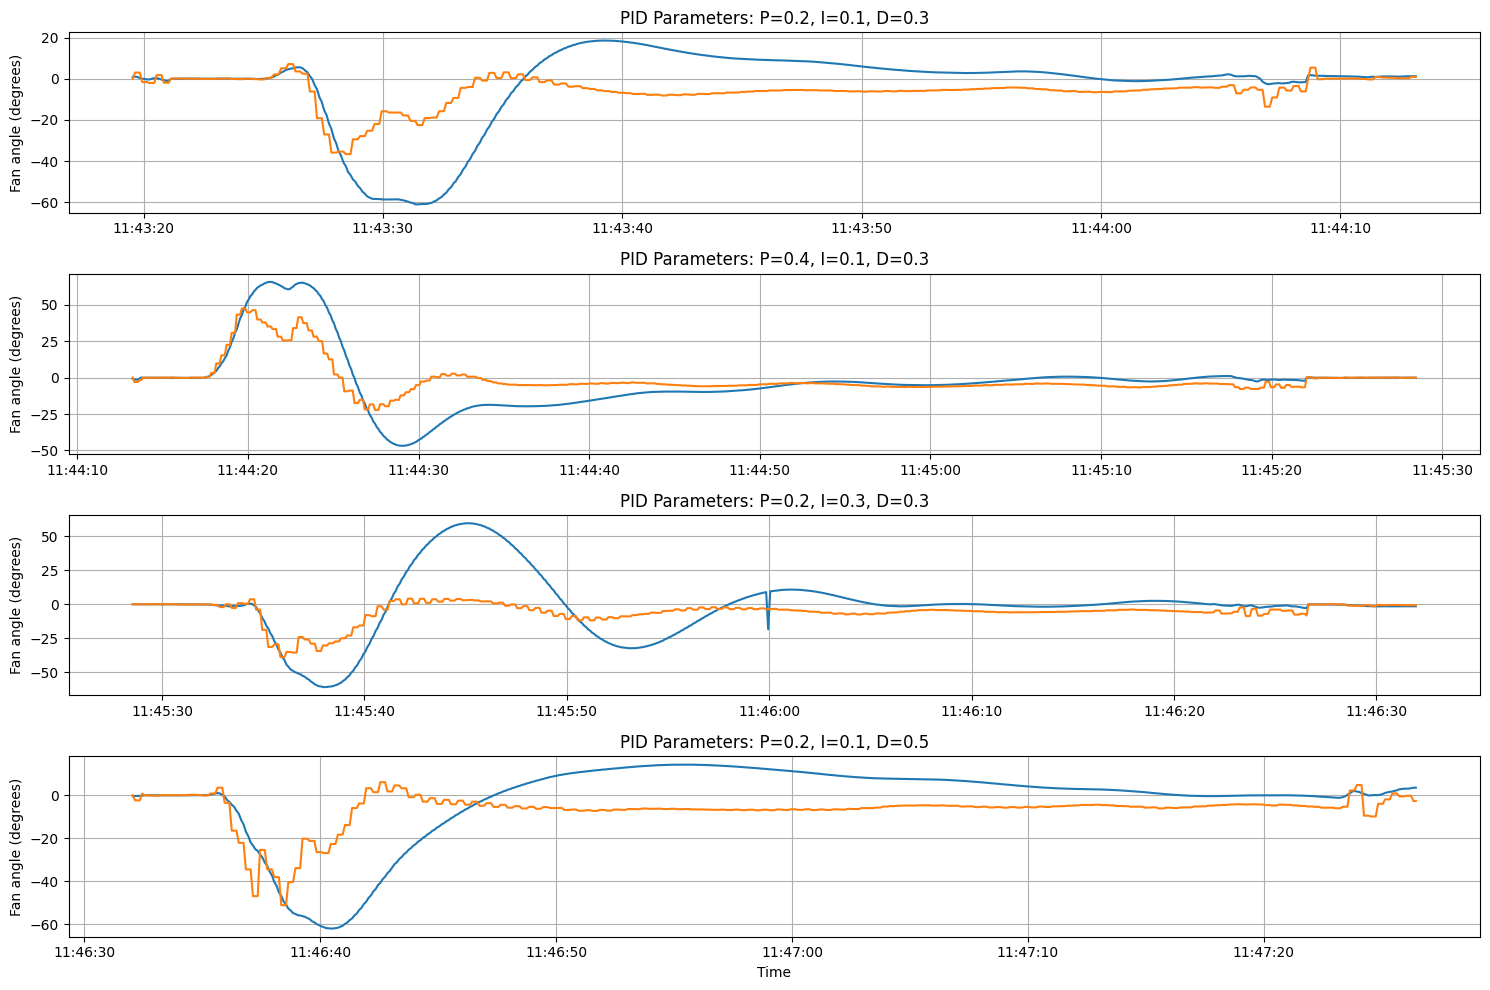

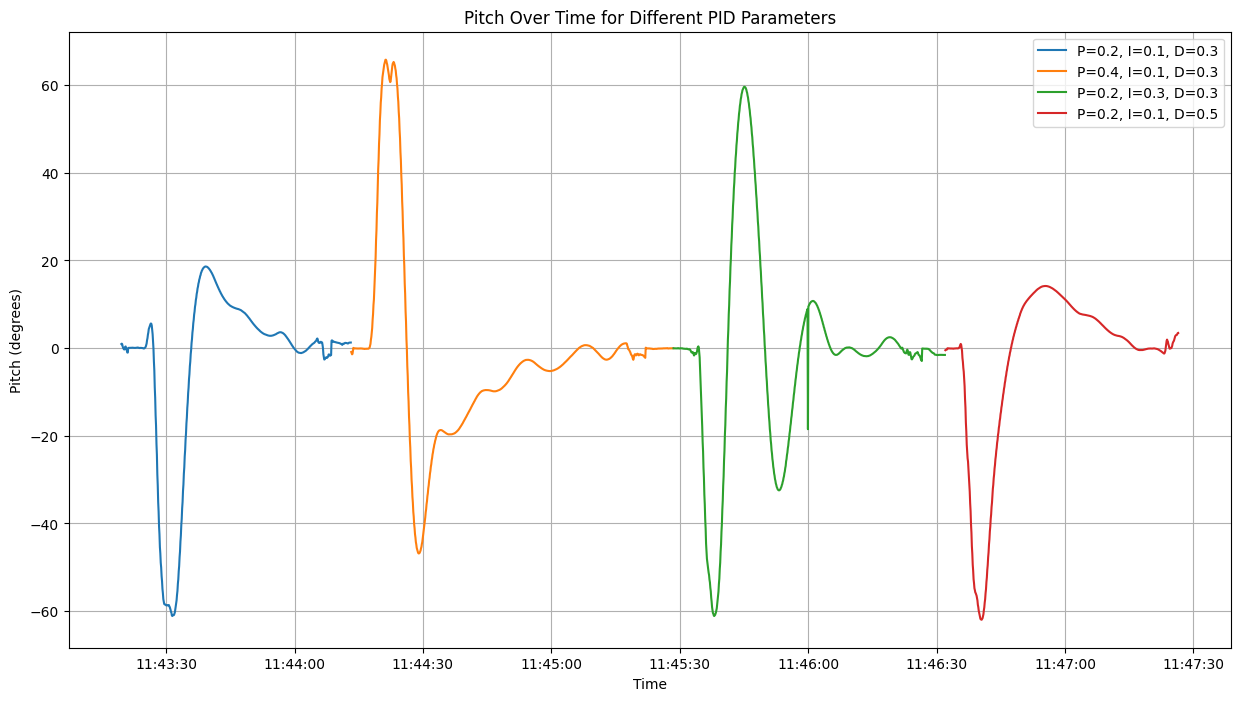


PID Performance Comparison:
P          I          D          Mean       Std Dev    Max        Min       
0.20       0.10       0.30       -2.81      19.31      18.63      -61.10    
0.40       0.10       0.30       -2.13      20.78      65.79      -46.84    
0.20       0.30       0.30       -0.99      22.76      59.63      -61.11    
0.20       0.10       0.50       -2.48      18.49      14.18      -61.95    


In [ ]:
'''
Script authored by Ben Pink to read data from 
model rocket's MPU6050 and plot its pitch and 
angle of PID controlled fan
'''

import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from datetime import datetime

def parse_log_file(filename):
    """Parse the log file and extract pitch values with their PID parameters"""
    data = []
    with open(filename, 'r') as file:
        for line in file:
            if "Pitch" in line:
                try:
                    # Extract pitch value
                    pitch_part = line.split('Pitch = ')[1].split(' Fan angle = ')[0]
                    pitch = float(pitch_part)

                    # Extract Fan angle
                    fan_angle_part = line.split('Fan angle = ')[1].split(' P = ')[0]
                    fan_angle = float(fan_angle_part)
                    
                    # Extract PID parameters
                    parts = line.split('P = ')[1].split(' I = ')
                    p = float(parts[0])
                    
                    parts = line.split('I = ')[1].split(' D = ')
                    i = float(parts[0])
                    
                    parts = line.split('D = ')[1].split(" ")
                    d = float(parts[0])
                    
                    data.append({
                        'timestamp': datetime.now(),  # Placeholder - actual logs may have timestamps
                        'pitch': pitch,
                        'fan_angle': fan_angle,
                        'P': p,
                        'I': i,
                        'D': d,
                    })
                except (IndexError, ValueError) as e:
                    print(f"Error parsing line: {line.strip()}. Error: {e}")
    return data

def plot_pid_comparisons(data):
    """Plot pitch over time for different PID parameter combinations"""
    # Group data by PID parameters
    pid_groups = defaultdict(list)
    for entry in data:
        key = (entry['P'], entry['I'], entry['D'])
        pid_groups[key].append(entry)

    
    # Create a figure with subplots for each PID combination
    plt.figure(figsize=(15, 10))
    
    # Plot each PID group
    for i, (pid_params, group_data) in enumerate(pid_groups.items()):
        p, i_val, d = pid_params
        timestamps = [x['timestamp'] for x in group_data]
        pitches = [x['pitch'] for x in group_data]
        
        # Create subplot for this PID combination
        plt.subplot(len(pid_groups), 1, i+1)
        plt.plot(timestamps, pitches, label=f'P={p}, I={i_val}, D={d}')
        plt.title(f'PID Parameters: P={p}, I={i_val}, D={d}')
        plt.ylabel('Pitch (degrees)')
        plt.grid(True)
        
        # Mark when PID parameters change
        for j in range(1, len(group_data)):
            if (group_data[j]['P'], group_data[j]['I'], group_data[j]['D']) != \
               (group_data[j-1]['P'], group_data[j-1]['I'], group_data[j-1]['D']):
                plt.axvline(x=group_data[j]['timestamp'], color='r', linestyle='--', alpha=0.5)

        ################## ^ pitch ^ ############# v fan angle v #################

        fan_angles = [x['fan_angle'] for x in group_data]

        plt.subplot(len(pid_groups), 1, i+1)
        plt.plot(timestamps, fan_angles, label=f'P={p}, I={i_val}, D={d}')
        plt.title(f'PID Parameters: P={p}, I={i_val}, D={d}')
        plt.ylabel('Fan angle (degrees)')
        plt.grid(True)
        
        # Mark when PID parameters change
        for j in range(1, len(group_data)):
            if (group_data[j]['P'], group_data[j]['I'], group_data[j]['D']) != \
               (group_data[j-1]['P'], group_data[j-1]['I'], group_data[j-1]['D']):
                plt.axvline(x=group_data[j]['timestamp'], color='r', linestyle='--', alpha=0.5)
    
    plt.xlabel('Time')
    plt.tight_layout()
    plt.show()
    
    # Also create a combined plot for comparison
    plt.figure(figsize=(15, 8))
    for pid_params, group_data in pid_groups.items():
        p, i_val, d = pid_params
        timestamps = [x['timestamp'] for x in group_data]
        pitches = [x['pitch'] for x in group_data]
        plt.plot(timestamps, pitches, label=f'P={p}, I={i_val}, D={d}')
    
    plt.title('Pitch Over Time for Different PID Parameters')
    plt.ylabel('Pitch (degrees)')
    plt.xlabel('Time')
    plt.legend()
    plt.grid(True)
    plt.show()

def analyze_pid_performance(data):
    """Calculate performance metrics for each PID parameter set"""
    pid_stats = {}
    
    # Group data by PID parameters
    pid_groups = defaultdict(list)
    for entry in data:
        key = (entry['P'], entry['I'], entry['D'])
        pid_groups[key].append(entry)
    
    # Calculate statistics for each group
    for pid_params, group_data in pid_groups.items():
        pitches = np.array([x['pitch'] for x in group_data])
        
        pid_stats[pid_params] = {
            'mean_pitch': np.mean(pitches),
            'std_dev': np.std(pitches),
            'max_pitch': np.max(pitches),
            'min_pitch': np.min(pitches),
            'settling_time': len(group_data),  # Simplified - would need timestamps for real settling time
            'overshoot': np.max(np.abs(pitches))  # Simplified overshoot calculation
        }
    
    # Print performance comparison
    print("\nPID Performance Comparison:")
    print("{:<10} {:<10} {:<10} {:<10} {:<10} {:<10} {:<10}".format(
        "P", "I", "D", "Mean", "Std Dev", "Max", "Min"))
    
    for params, stats in pid_stats.items():
        p, i, d = params
        print("{:<10.2f} {:<10.2f} {:<10.2f} {:<10.2f} {:<10.2f} {:<10.2f} {:<10.2f}".format(
            p, i, d, 
            stats['mean_pitch'], 
            stats['std_dev'], 
            stats['max_pitch'], 
            stats['min_pitch']))

def main():
    # Parse the log file
    log_data = parse_log_file('C:/Users/benjp/Downloads/DATALOG_Fan.TXT')
    
    if not log_data:
        print("No valid data found in the log file.")
        return
    
    # Assign sequential timestamps since the log doesn't have real timestamps
    start_time = datetime.now()
    for i, entry in enumerate(log_data):
        entry['timestamp'] = start_time + timedelta(seconds=i*0.1)  # Assuming 0.1s between samples
    
    # Plot the comparisons
    plot_pid_comparisons(log_data)
    
    # Analyze performance
    analyze_pid_performance(log_data)

if __name__ == "__main__":
    from datetime import timedelta
    main()

In [11]:
import os

print(os.getcwd())

C:\Users\benjp
